<a href="https://colab.research.google.com/github/YasinnSoylu/-aselsan-stock-prive/blob/main/GPH_%26_Moving_Average_aselsan_stock_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [79]:
df = pd.read_csv('/content/ASELS.csv')
df['Şimdi'] = df['Şimdi'].str.replace(',', '.')
df = df[['Tarih','Şimdi']]
df['Şimdi'] = df['Şimdi'].astype(float)

df["Tarih"]=pd.to_datetime(df.Tarih,dayfirst=True)
df.set_index("Tarih",inplace=True)


In [81]:
df.resample(rule='A').mean()


,Şimdi
Tarih,
2018-12-31,12.703710
2019-12-31,9.837631
2020-12-31,15.250595
2021-12-31,16.595100
2022-12-31,29.104444
2023-12-31,57.633333


# **Hareketli Ortalama (Moving Average)**


In [82]:
df['6SMA'] = df['Şimdi'].rolling(window=6).mean()
df['12SMA'] = df['Şimdi'].rolling(window=12).mean()
df['2SMA'] = df['Şimdi'].rolling(window=2).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2023-03-17 to 2018-03-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Şimdi   1239 non-null   float64
 1   6SMA    1234 non-null   float64
 2   12SMA   1228 non-null   float64
 3   2SMA    1238 non-null   float64
dtypes: float64(4)
memory usage: 48.4 KB


In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["Şimdi"], name="Şimdi", mode="lines"))
fig.add_trace(go.Scatter(x=df.index, y=df["6SMA"], name="6SMA", mode="lines"))
fig.add_trace(go.Scatter(x=df.index, y=df["12SMA"], name="12SMA", mode="lines"))
fig.add_trace(go.Scatter(x=df.index, y=df["2SMA"], name="2SMA", mode="lines"))
fig.update_layout(
    title="Veriler",
    xaxis_title="Tarih",
    yaxis_title="Değer"
)
fig.show()

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index[-120:], y=df["Şimdi"].iloc[-120:], name="Şimdi"))
fig.add_trace(go.Scatter(x=df.index[-120:], y=df["6SMA"].iloc[-120:], name="6SMA"))
fig.update_layout(
    title="Open ve 6SMA Verileri (Son 120 Gün)",
    xaxis_title="Tarih",
    yaxis_title="Değer"
)
fig.show()

# **Geweke-Porter-Hudak (GPH)**





The Geweke-Porter-Hudak (GPH) method is a technique used for modeling time series data with an autoregressive model. This method uses an information criterion to select the optimal number of lags for the autoregressive model.

The GPH method has been proposed as an alternative to commonly used criteria such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) for selecting the lag order of the autoregressive model. While AIC and BIC are used to measure the goodness of fit of the autoregressive model, these criteria only measure the goodness of fit for a given lag order. The GPH method measures the performance of the autoregressive model across all appropriate lag orders when selecting the lag order.

The GPH method consists of two separate parts for determining the lag order of the autoregressive model: a training set and a test set. The training set is used to estimate the parameters of the autoregressive model. The test set is used to evaluate the performance of the model.

The GPH method follows two steps to determine the lag order:

First, the parameters of the autoregressive model are estimated for all lag orders using the training set. These parameters are estimated using the data in the training set.

Next, the performance of the autoregressive model is measured using the test set. The performance of the autoregressive model is measured for each lag order, and the lag order with the best performance is selected.

The advantage of the GPH method is that it considers multiple lag orders when selecting the optimal lag order for the autoregressive model. This provides a broader perspective when selecting the lag order and can improve the performance of the model. However, the disadvantage of the GPH method is that it uses the training set to estimate the parameters of the model, which can lead to overfitting.

In conclusion, the Geweke-Porter-Hudak (GPH) method is a technique used for selecting the lag order of autoregressive models. This method considers multiple lag orders when evaluating the performance of the model and provides a broader perspective when selecting the lag order. However, it is important to select an appropriate training set and manage the risk of overfitting.

The GPH method is commonly used in financial time series analysis and econometrics. It provides an alternative approach to criteria such as AIC or BIC for selecting the optimal lag order and can improve the performance of the model. The GPH method can also be used for other time series models, such as moving average, autoregressive moving average (ARMA), and autoregressive integrated moving average (ARIMA) models. The GPH method can be used to select the appropriate lag orders for these models and improve their performance.

In [85]:
df=df.asfreq("d")
df = df.fillna(method  = "bfill")

In [86]:
import statsmodels.api as sm

In [87]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df['Şimdi'], lags=1)
result = model.fit()

gph_forecast = result.predict(start=len(df), end=len(df)+120, dynamic=False)


In [88]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Şimdi'].index, y=df['Şimdi'], name='Orijinal Veri'))
fig.add_trace(go.Scatter(x=gph_forecast.index, y=gph_forecast, name='GPH Tahmini'))

fig.update_layout(
    xaxis_title='Tarih',
    yaxis_title='Aselsan Hisse Fiyatı',
    title='Aselsan Hisse Fiyatı GPH Tahmini',
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=1
    )
)

fig.show()



In [95]:
import numpy as np 

In [91]:
df = pd.read_csv('/content/ASELS.csv')
df['Şimdi'] = df['Şimdi'].str.replace(',', '.')
df = df[['Tarih','Şimdi']]
df['Şimdi'] = df['Şimdi'].astype(float)

df["Tarih"]=pd.to_datetime(df.Tarih,dayfirst=True)
df.set_index("Tarih",inplace=True)

In [93]:
# Yalnızca kapanış fiyatlarını kullanma
ts = df["Şimdi"]

In [96]:
from statsmodels.tsa.stattools import acf

# Tüm olası gecikmeleri içeren bir gecikme listesi oluşturma
max_lag = 50
lags = range(1, max_lag)

# Her gecikme için ACF hesaplayın
acf_vals = acf(ts, nlags=max_lag)

# ACF'nin ilk yarısının kritik noktalarını hesaplayın
crit_vals = 1.96 / np.sqrt(len(ts))

# Her gecikme için ilk geçiş noktasını bulun
crossed = np.where((acf_vals[:-1] > crit_vals) & (acf_vals[1:] < crit_vals))[0]

# İlk geçiş noktalarını içeren bir liste oluşturun
if len(crossed) > 0:
    gph_lag = int(np.median(np.diff(crossed)))
else:
    gph_lag = 1

print("GPH Lag: ", gph_lag)

GPH Lag:  1


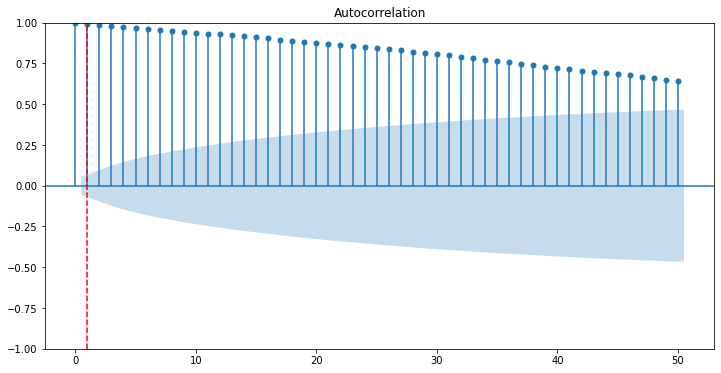

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
# Otokorelasyon grafiğini çizme
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(ts, lags=50, ax=ax)
ax.axvline(gph_lag, color="red", linestyle="--")
plt.show()
